In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('car_driving_risk.csv')
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [3]:
df.shape

(15, 2)

In [4]:
df.isna().sum()

speed    0
risk     0
dtype: int64

<AxesSubplot:xlabel='speed'>

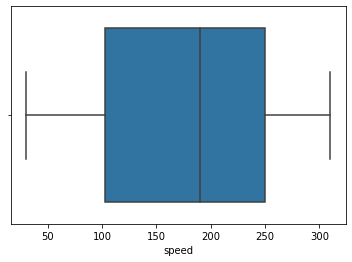

In [5]:
sns.boxplot(x='speed',data=df)

<AxesSubplot:xlabel='risk'>

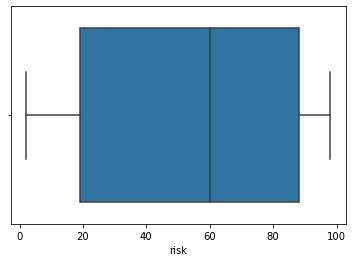

In [6]:
sns.boxplot(x='risk',data=df)

In [7]:
x=df.drop(columns='risk') # or df[['speed']] or df.speed
y=df['risk']

Text(0, 0.5, 'risk(%)')

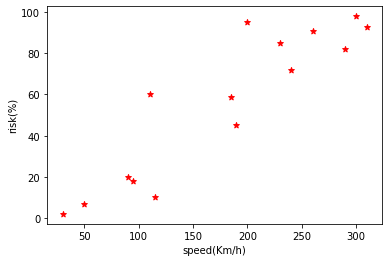

In [8]:
%matplotlib inline
plt.scatter(x,y,c='r',marker='*')
plt.xlabel('speed(Km/h)')
plt.ylabel('risk(%)')

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=1)

In [10]:
 reg=LinearRegression()

In [11]:
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
predictions=reg.predict(x_test)
predictions

array([ 27.15301215,  73.82259334,   3.81822156, 101.04651569,
        97.15738393,  77.7117251 ])

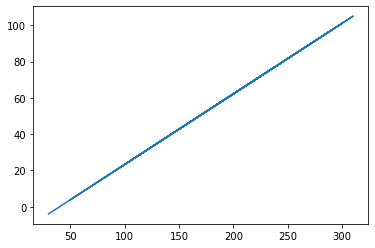

In [13]:
##best Fit line
plt.plot(x,reg.predict(df[['speed']]))

In [14]:
reg.coef_

array([0.38891318])

In [15]:
reg.intercept_

-15.627437265017058

In [16]:
reg.predict([[320]])

array([108.82477923])

Text(0.5, 1.0, 'Car_Driving_Risk')

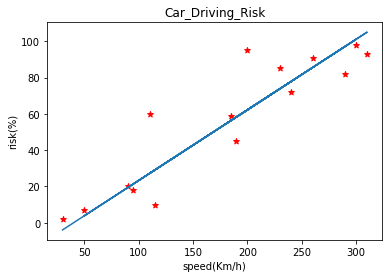

In [17]:
plt.scatter(x,y,c='r',marker='*')
plt.xlabel('speed(Km/h)')
plt.ylabel('risk(%)')
plt.plot(x,reg.predict(df[['speed']]))
plt.title('Car_Driving_Risk')

In [18]:
##Accuracy_test
metrics.r2_score(y_test,predictions)

0.7133824900141748

In [33]:
#or
reg.score(x_test,y_test)

0.7133824900141748

In [19]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

15.735491166079136

# prediction

In [20]:
## creating new csv
lst1=[2810,2930,3500,3233,3819,8110,6203,5790,6350,7715,4983]
dict1={'areas':lst1}
n_area=pd.DataFrame(dict1)
n_area

,areas
0,2810
1,2930
2,3500
3,3233
4,3819
5,8110
6,6203
7,5790
8,6350
9,7715


In [21]:
n_area.to_csv('New_areas.csv')
n_df=pd.read_csv('New_areas.csv')

In [22]:
p=reg.predict(n_df[['areas']])
n_df['prices']=p
n_df.to_csv('predictions.csv')

# Gradient descent
# Mathematics


In [23]:
dfm=pd.read_csv('home data.csv')
dfm

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


In [24]:
#1st step
x=dfm['x']
y=dfm['y']

m = 0
c = 0
learning_rate=0.0001
n=(len(x))

#2nd step

iterations=1000
for i in range(iterations):
    y1 = m * x + c
    cost=(1/n)*sum(val**2 for val in (y-y1))
    d_m=(-2/n)* sum(x * (y - y1)) #from equation
    d_c=(-2/n)* sum(y - y1)
    
    m = m - (learning_rate * d_m)
    c = c - (learning_rate * d_c)
    print(f'slope:{m}\tintercept:{c}\tcost:{cost}\ti={i}')
print(m,c)
    

slope:0.7424335285442664	intercept:0.014629895049575754	cost:5611.166153829125	i=0
slope:1.1126970531591416	intercept:0.021962519495058154	cost:1479.0416101641983	i=1
slope:1.2973530613155333	intercept:0.025655870599552186	cost:451.30505306728827	i=2
slope:1.3894434413955663	intercept:0.0275342538687902	cost:195.68774459358667	i=3
slope:1.4353697670010162	intercept:0.028507481513901093	cost:132.11090808257637	i=4
slope:1.4582732927878312	intercept:0.029029292372442533	cost:116.29812218648578	i=5
slope:1.4696949563898791	intercept:0.029325973726768786	cost:112.36514739433844	i=6
slope:1.4753904198682315	intercept:0.02951037889671325	cost:111.38690341060143	i=7
slope:1.4782301298722174	intercept:0.0296387897539973	cost:111.14355614188788	i=8
slope:1.4796456270098886	intercept:0.029739275026144867	cost:111.08299140670091	i=9
slope:1.4803508449518048	intercept:0.029825833065392132	cost:111.06788810058573	i=10
slope:1.4807018345728706	intercept:0.029905445088297247	cost:111.06409190119287	i

slope:1.4807476308502732	intercept:0.045458265449082214	cost:111.05155487955965	i=225
slope:1.4807462076081295	intercept:0.045530852598686014	cost:111.05150216977873	i=226
slope:1.48074478437646	intercept:0.04560343921408975	cost:111.05144946077361	i=227
slope:1.480743361155265	intercept:0.045676025295297344	cost:111.05139675254428	i=228
slope:1.480741937944544	intercept:0.045748610842312736	cost:111.05134404509087	i=229
slope:1.4807405147442967	intercept:0.04582119585513986	cost:111.05129133841311	i=230
slope:1.4807390915545235	intercept:0.045893780333782636	cost:111.05123863251119	i=231
slope:1.4807376683752242	intercept:0.045966364278245006	cost:111.05118592738502	i=232
slope:1.4807362452063988	intercept:0.046038947688530896	cost:111.05113322303471	i=233
slope:1.480734822048047	intercept:0.04611153056464424	cost:111.05108051946003	i=234
slope:1.480733398900169	intercept:0.04618411290658896	cost:111.05102781666113	i=235
slope:1.4807319757627644	intercept:0.046256694714369	cost:111.05

slope:1.4803679969073844	intercept:0.06482007674077792	cost:111.03750888259044	i=492
slope:1.4803665764591303	intercept:0.06489252139848126	cost:111.0374563795499	i=493
slope:1.48036515602133	intercept:0.06496496552303319	cost:111.03740387728206	i=494
slope:1.4803637355939832	intercept:0.06503740911443763	cost:111.03735137578693	i=495
slope:1.48036231517709	intercept:0.06510985217269852	cost:111.03729887506462	i=496
slope:1.4803608947706501	intercept:0.06518229469781976	cost:111.03724637511513	i=497
slope:1.4803594743746638	intercept:0.06525473668980529	cost:111.0371938759383	i=498
slope:1.4803580539891306	intercept:0.06532717814865903	cost:111.03714137753416	i=499
slope:1.4803566336140508	intercept:0.06539961907438491	cost:111.03708887990278	i=500
slope:1.480355213249424	intercept:0.06547205946698684	cost:111.03703638304412	i=501
slope:1.4803537928952504	intercept:0.06554449932646875	cost:111.03698388695813	i=502
slope:1.4803523725515297	intercept:0.06561693865283456	cost:111.03693139

slope:1.4800174635913848	intercept:0.08269771925132956	cost:111.02456408125454	i=739
slope:1.4800160457228562	intercept:0.08277003233976911	cost:111.02451176874602	i=740
slope:1.4800146278647623	intercept:0.08284234489602553	cost:111.02445945700738	i=741
slope:1.480013210017103	intercept:0.08291465692010273	cost:111.02440714603877	i=742
slope:1.4800117921798785	intercept:0.08298696841200463	cost:111.02435483584006	i=743
slope:1.4800103743530884	intercept:0.08305927937173516	cost:111.02430252641123	i=744
slope:1.4800089565367325	intercept:0.0831315897992982	cost:111.02425021775248	i=745
slope:1.480007538730811	intercept:0.0832038996946977	cost:111.02419790986362	i=746
slope:1.4800061209353237	intercept:0.08327620905793756	cost:111.02414560274465	i=747
slope:1.4800047031502706	intercept:0.08334851788902171	cost:111.02409329639552	i=748
slope:1.4800032853756515	intercept:0.08342082618795406	cost:111.0240409908163	i=749
slope:1.4800018676114666	intercept:0.08349313395473852	cost:111.023988

slope:1.4796944594465096	intercept:0.09917133921251227	cost:111.01265673270248	i=967
slope:1.4796930439551073	intercept:0.09924353106449411	cost:111.01260459545594	i=968
slope:1.4796916284741224	intercept:0.09931572238518506	cost:111.01255245897669	i=969
slope:1.4796902130035547	intercept:0.09938791317458902	cost:111.01250032326483	i=970
slope:1.4796887975434039	intercept:0.09946010343270989	cost:111.01244818832039	i=971
slope:1.4796873820936702	intercept:0.09953229315955159	cost:111.0123960541432	i=972
slope:1.4796859666543534	intercept:0.09960448235511803	cost:111.01234392073347	i=973
slope:1.4796845512254535	intercept:0.0996766710194131	cost:111.01229178809103	i=974
slope:1.4796831358069704	intercept:0.09974885915244075	cost:111.01223965621602	i=975
slope:1.4796817203989039	intercept:0.09982104675420486	cost:111.01218752510825	i=976
slope:1.479680305001254	intercept:0.09989323382470934	cost:111.01213539476781	i=977
slope:1.4796788896140203	intercept:0.09996542036395811	cost:111.0120

# Make Predictions


In [25]:
x_new=float(input('Enter x_new: '))
y_new=m * x_new + c
print(y_new)

Enter x_new: 38
56.328149632726586
